In [1]:
#importing require python packages
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from emoji import UNICODE_EMOJI
import os
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import re
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from nltk.corpus import stopwords


Using TensorFlow backend.
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [55]:
#NLP stopwords class to remove stop words like 'are, the an' etc.
stop_words = set(stopwords.words('english'))

In [56]:
#read and display dataset values
dataset = pd.read_csv("Dataset/Insta_data.csv",encoding='utf8')
dataset

,sentiment,insta_comment,emoji_emoticon
0,0,hp laptop not giving better performance compar...,NaN
1,4,stellargirl I loooooooovvvvvveee my Kindle Not...,😍
2,4,Reading my kindle Love it Lee childs is good read,😍
3,4,Ok first assesment of the kindle it fucking rocks,😍
4,4,kenburbary Youll love your Kindle Ive had mine...,😍
...,...,...,...
494,2,Ask Programming LaTeX or InDesign submitted by...,😜
495,0,On that note I hate Word I hate Pages I hate L...,😭
496,4,Ahhh back in a real text editing environment I...,😍
497,0,Trouble in Iran I see Hmm Iran Iran so far awa...,😭


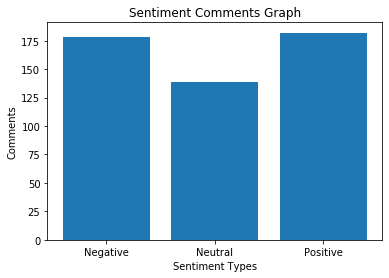

In [57]:
unique, count = np.unique(dataset['sentiment'], return_counts = True)
height = count
bars = ('Negative','Neutral','Positive')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.title("Sentiment Comments Graph")
plt.xlabel("Sentiment Types")
plt.ylabel("Comments")
plt.show()

In [58]:
#now read all comments from dataset with icons and then remove stopwords and then create an array of X training features
#and y class label
X = []
Y = []
count = 0
for i in range(len(dataset)):#loop entire dataset
    sentiment = dataset.get_value(i,0,takeable = True)#read sentiment
    insta_comment = dataset.get_value(i,1,takeable = True)#read comment
    insta_comment = insta_comment.lower()
    icon = dataset.get_value(i,2,takeable = True)#read iocn
    if str(icon) != 'nan': #from here we perform text processing logic
        icon = UNICODE_EMOJI[icon]
        icon = ''.join(re.sub('[^A-Za-z\s]+', '', icon))
        icon = icon.lower()
    else:
        icon = ''
    arr = insta_comment.split(" ")
    comment = ''
    for k in range(len(arr)):
        word = arr[k].strip()
        if len(word) > 2 and word not in stop_words:
            comment += word +" "
    text = comment.strip()+" "+icon
    X.append(text)#add text comment to X array
X = np.asarray(X)
Y = pd.get_dummies(dataset['sentiment']).values #get all sentiments class labels as numeric array
Y =  np.argmax(Y, axis=1)
print("Comments After processing")
print(X)


Comments After processing
['laptop giving better performance compare dell '
 'stellargirl loooooooovvvvvveee kindle cool fantastic right smilingfacewithhearteyes'
 'reading kindle love lee childs good read smilingfacewithhearteyes'
 'first assesment kindle fucking rocks smilingfacewithhearteyes'
 'kenburbary youll love kindle ive mine months never looked back new big one huge need remorse smilingfacewithhearteyes'
 'mikefish fair enough kindle think perfect smilingfacewithhearteyes'
 'richardebaker big quite happy kindle smilingfacewithhearteyes'
 'fuck economy hate aig non loan given asses loudlycryingface'
 'jquery new best friend smilingfacewithhearteyes'
 'loves twitter smilingfacewithhearteyes'
 'love obama makes jokes smilingfacewithhearteyes'
 'check video president obama white house correspondents dinner winkingfacewithtongue'
 'karoli firmly believe obamapelosi zero desire civil charade slogan want destroy conservatism loudlycryingface'
 'house correspondents dinner last night

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [59]:
#applying TFIDF on entire comments to convert text data to numeric vector
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, use_idf=True, smooth_idf=False, norm=None, decode_error='replace', max_features=200)
tfidf = tfidf_vectorizer.fit_transform(X).toarray()    #input X comments to TFIDF to get numeric vector    
df = pd.DataFrame(tfidf, columns=tfidf_vectorizer.get_feature_names())
df

,aig,also,amazing,american,amp,api,app,atampt,awesome,back,...,white,winkingfacewithtongue,wish,wont,work,world,worst,would,years,yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.573549,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,2.278132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.573549,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
X = df.values
scaler = StandardScaler()
X = scaler.fit_transform(X)#normalizing numeric vector
#splitting dataset into train and test where application using 80% dataset for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) #split dataset into train and test
print()
print("Total records found in dataset : "+str(X.shape[0]))
print("Training Size (80%): "+str(X_train.shape[0])) #print training and test size
print("Testing Size (20%): "+str(X_test.shape[0]))
print()


Total records found in dataset : 499
Training Size (80%): 399
Testing Size (20%): 100



In [61]:
#defining global features to store accuracy and other values
accuracy = []
precision = []
recall = [] 
fscore = []

In [62]:
#function to calculate all metrics
def calculateMetrics(algorithm, testY, predict):
    labels = ['Negative', 'Neutral', 'Positive']
    a = accuracy_score(testY,predict)*100
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+" Accuracy  :  "+str(a))
    print(algorithm+" Precision : "+str(p))
    print(algorithm+" Recall    : "+str(r))
    print(algorithm+" FScore    : "+str(f))
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(6, 5))
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="viridis" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

Naive Bayes Accuracy  :  87.0
Naive Bayes Precision : 88.28928706977487
Naive Bayes Recall    : 88.30940988835727
Naive Bayes FScore    : 88.2157926461724


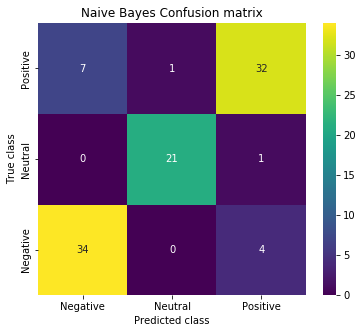

In [63]:
#now train Naive Bayes algortihm on 80% train data and then perform prediction on 20% test data
nb_cls = GaussianNB()
nb_cls.fit(X_train, y_train)
predict = nb_cls.predict(X_test)
calculateMetrics("Naive Bayes", y_test, predict)

Random Forest Accuracy  :  100.0
Random Forest Precision : 100.0
Random Forest Recall    : 100.0
Random Forest FScore    : 100.0


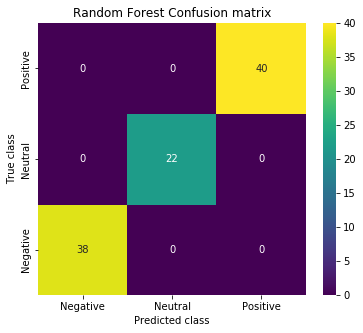

In [64]:
#now train Random Forest algortihm on 80% train data and then perform prediction on 20% test data
rf_cls = RandomForestClassifier()
rf_cls.fit(X_train, y_train)
predict = rf_cls.predict(X_test)
calculateMetrics("Random Forest", y_test, predict)

Decision Tree Accuracy  :  100.0
Decision Tree Precision : 100.0
Decision Tree Recall    : 100.0
Decision Tree FScore    : 100.0


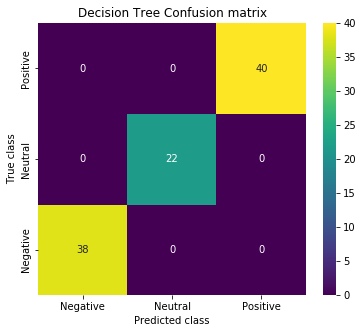

In [65]:
#now train Decision Tree algortihm on 80% train data and then perform prediction on 20% test data
dt_cls = DecisionTreeClassifier()
dt_cls.fit(X_train, y_train)
predict = dt_cls.predict(X_test)
calculateMetrics("Decision Tree", y_test, predict)

SVM Accuracy  :  96.0
SVM Precision : 96.62393162393163
SVM Recall    : 95.94098883572568
SVM FScore    : 96.25943823618243


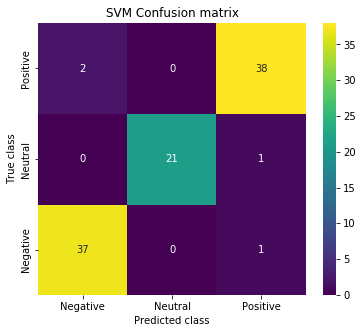

In [66]:
#now train SVM algortihm on 80% train data and then perform prediction on 20% test data
svm_cls = SVC()
svm_cls.fit(X_train, y_train)
predict = svm_cls.predict(X_test)
calculateMetrics("SVM", y_test, predict)

LSTM Accuracy  :  100.0
LSTM Precision : 100.0
LSTM Recall    : 100.0
LSTM FScore    : 100.0


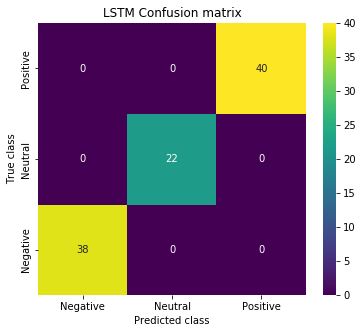

In [67]:
#now train LSTM on 80 Training data and test on 20% test data
from keras.callbacks import ModelCheckpoint 
import os
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)
lstm_model = Sequential()
lstm_model.add(Embedding(32, 128, input_length = X_train.shape[1]))
lstm_model.add(SpatialDropout1D(0.4))
lstm_model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(y_train1.shape[1],activation='softmax'))
lstm_model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
if os.path.exists("model/lstm_weights.hdf5") == False:
    model_check_point = ModelCheckpoint(filepath="model/lstm_weights.hdf5", verbose = 1, save_best_only = True)
    hist = lstm_model.fit(X_train, y_train1, batch_size = 32, epochs = 20, validation_data=(X_test, y_test1), callbacks=[model_check_point], verbose=1)
else:
    lstm_model.load_weights("model/lstm_weights.hdf5")
predict = lstm_model.predict(X_test)
predict = np.argmax(predict, axis=1)
testY = np.argmax(y_test1, axis=1)
calculateMetrics("LSTM", testY, predict)

CNN Accuracy  :  98.0
CNN Precision : 98.41269841269842
CNN Recall    : 97.60765550239235
CNN FScore    : 97.96735362702465


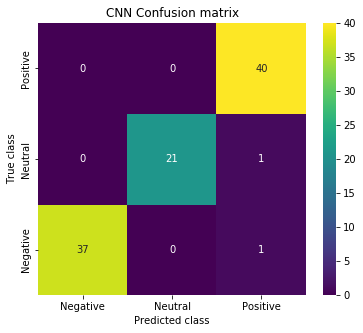

In [68]:
from keras.layers import  MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D
from keras.models import Sequential
#reshape data as per CNN model
X_train1 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1, 1))
X_test1 = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1, 1))
#defining cnn layers with input and output neurons
cnn_model = Sequential()
cnn_model.add(Convolution2D(32, (1, 1), input_shape = (X_train1.shape[1], X_train1.shape[2], X_train1.shape[3]), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (1, 1)))
cnn_model.add(Convolution2D(32, (1, 1), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (1, 1)))
cnn_model.add(Flatten())
cnn_model.add(Dense(units = 256, activation = 'relu'))
cnn_model.add(Dense(units = y_train1.shape[1], activation = 'softmax'))
cnn_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
if os.path.exists("model/cnn_weights.hdf5") == False:
    model_check_point = ModelCheckpoint(filepath='model/cnn_weights.hdf5', verbose = 1, save_best_only = True)
    hist = cnn_model.fit(X_train1, y_train1, batch_size = 32, epochs = 20, validation_data=(X_test1, y_test1), callbacks=[model_check_point], verbose=1)
else:
    cnn_model.load_weights("model/cnn_weights.hdf5")
predict = cnn_model.predict(X_test1)
predict = np.argmax(predict, axis=1)
testY = np.argmax(y_test1, axis=1)
calculateMetrics("CNN", testY, predict)        

In [69]:
#Performance of all algorithms in tabular format
columns = ["Algorithm Name","Accuracy", "Precision", "Recall", "FSCORE"]
values = []
algorithm_names = ["Naive Bayes", "Random Forest", "Decison Tree", "SVM", "LSTM", "CNN"]
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i],accuracy[i],precision[i],recall[i],fscore[i]])
    
temp = pd.DataFrame(values,columns=columns)
temp

,Algorithm Name,Accuracy,Precision,Recall,FSCORE
0,Naive Bayes,87.0,88.289287,88.309410,88.215793
1,Random Forest,100.0,100.000000,100.000000,100.000000
2,Decison Tree,100.0,100.000000,100.000000,100.000000
3,SVM,96.0,96.623932,95.940989,96.259438
4,LSTM,100.0,100.000000,100.000000,100.000000
5,CNN,98.0,98.412698,97.607656,97.967354


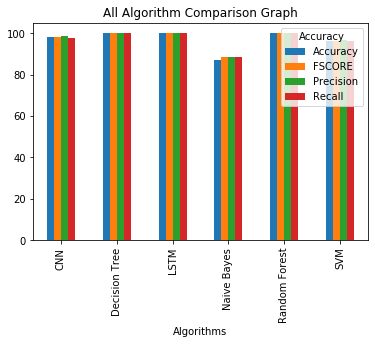

In [70]:
#plot comparison graph between all algorithms
df = pd.DataFrame([['Naive Bayes','Accuracy',accuracy[0]],['Naive Bayes','Precision',precision[0]],['Naive Bayes','Recall',recall[0]],['Naive Bayes','FSCORE',fscore[0]],
                   ['Random Forest','Accuracy',accuracy[1]],['Random Forest','Precision',precision[1]],['Random Forest','Recall',recall[1]],['Random Forest','FSCORE',fscore[1]],
                   ['Decision Tree','Accuracy',accuracy[2]],['Decision Tree','Precision',precision[2]],['Decision Tree','Recall',recall[2]],['Decision Tree','FSCORE',fscore[2]],
                   ['SVM','Accuracy',accuracy[3]],['SVM','Precision',precision[3]],['SVM','Recall',recall[3]],['SVM','FSCORE',fscore[3]],
                   ['LSTM','Accuracy',accuracy[4]],['LSTM','Precision',precision[4]],['LSTM','Recall',recall[4]],['LSTM','FSCORE',fscore[4]],
                   ['CNN','Accuracy',accuracy[5]],['CNN','Precision',precision[5]],['CNN','Recall',recall[5]],['CNN','FSCORE',fscore[5]],
                  ],columns=['Algorithms','Accuracy','Value'])
df.pivot("Algorithms", "Accuracy", "Value").plot(kind='bar')
plt.title("All Algorithm Comparison Graph")
plt.show()

In [76]:
#now read test comments from file and then predict sentiment
test = pd.read_csv('Dataset/test.txt',encoding='utf8')#read test data
test = test.values
for i in range(len(test)):
    comments = test[i,0]#loop all comments from test dataset
    arr = comments.split(" ")
    icon = ''
    msg = ''
    for j in range(len(arr)): #find emoticons
        for emoji in UNICODE_EMOJI:
            if emoji == arr[j]:
                icon = UNICODE_EMOJI[arr[j]]
                icon = ''.join(re.sub('[^A-Za-z\s]+', '', icon))
    if len(icon) > 0: #if emoticon exists then add to comment messagee
        for k in range(len(arr)-1):
            word = arr[k].strip()
            if len(word) > 2 and word not in stop_words:
                msg+=arr[k]+" "
        msg+=icon
    else:
        for k in range(len(arr)):#remove stop words
            word = arr[k].strip()
            if len(word) > 2 and word not in stop_words:
                msg+=arr[k]+" "
    text = msg.strip()
    comment = [text]
    comment = tfidf_vectorizer.transform(comment).toarray()#convert text to numeric vector
    comment = scaler.transform(comment)#normalize vector
    predict = rf_cls.predict(comment)[0]# predict sentiment from test comments
    if predict == 0:
        print("Comment = "+comments+" Predicted as ----> NEGATIVE\n")
    elif predict == 1:
        print("Comment = "+comments+" Predicted as ----> NEUTRAL\n")
    elif predict == 2:
        print("Comment = "+comments+" Predicted as ----> POSITIVE\n")    

Comment = Ok first assesment of the kindle it fucking rocks 😍 Predicted as ----> POSITIVE

Comment = kenburbary Youll love your Kindle Ive had mine for a few months and never looked back The new big one is huge No need for remorse 😍 Predicted as ----> POSITIVE

Comment = mikefish Fair enough But i have the Kindle and I think its perfect 😍 Predicted as ----> POSITIVE

Comment = richardebaker no it is too big Im quite happy with the Kindle 😍 Predicted as ----> POSITIVE

Comment = Fuck this economy I hate aig and their non loan given asses 😭 Predicted as ----> NEGATIVE

Comment = Jquery is my new best friend 😍 Predicted as ----> POSITIVE

Comment = Loves twitter 😍 Predicted as ----> POSITIVE

Comment = how can you not love Obama he makes jokes about himself 😍 Predicted as ----> POSITIVE

Comment = Check this video out  President Obama at the White House Correspondents Dinner 😜 Predicted as ----> NEUTRAL

Comment = Karoli I firmly believe that ObamaPelosi have ZERO desire to be civil Its a